### Mount Google Drive and setup paths

In [1]:
import os
import sys

from google.colab import drive

DRIVE_MOUNT_PATH = '/content/drive'
drive.mount(DRIVE_MOUNT_PATH)

PRJ_DIR = os.path.join(DRIVE_MOUNT_PATH, 'My Drive/yyColab/1st-DL-CVMarathon')
sys.path.append(PRJ_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [0]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img_path = os.path.join(PRJ_DIR, 'data/lena.png')
img = cv2.imread(img_path)

## Affine Transformation - Case 1: rotation 45 > scale 0..5 > shift (x+100, y-50)

Rotation Matrix
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]

Translation Matrix
[[  1.   0. 100.]
 [  0.   1. -50.]]


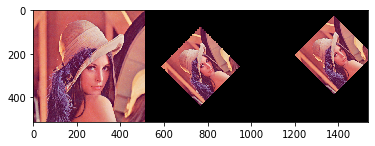

In [3]:
rows, cols = img.shape[:2]

# 取得旋轉矩陣
# getRotationMatrix2D(center, angle, scale)
M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.5)
print('Rotation Matrix')
print(M_rotate)
print()

# 取得平移矩陣
M_translate = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)
print('Translation Matrix')
print(M_translate)

# 旋轉
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))

# 平移
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (cols, rows))

# 組合 + 顯示圖片
img_show_rotate_trans = np.hstack((img, img_rotate, img_rotate_trans))
plt.imshow(img_show_rotate_trans[:, :, ::-1])
plt.show()

## Affine Transformation - Case 2: any three point

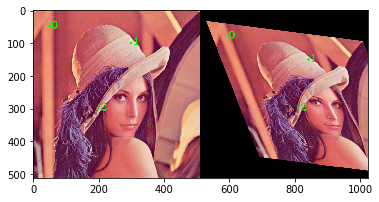

In [4]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pts1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pts2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
M_affine = cv2.getAffineTransform(pts1, pts2)
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pts1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

for idx, pts in enumerate(pts2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
plt.imshow(img_show_affine[:, :, ::-1])
plt.show()